**Task:**
    
    Plot map of the temperature distribution in the ocean with some nice picture on the background.
    
**Solution:**
    
    background_img function in cartopy 0.15

The [cartopy](http://scitools.org.uk/cartopy/) is a great tool for creating maps in many ways more advanced than the usual workhorse for map creation in pyhton - the Basemap module. However I really missed one nice feature that Basemap have - easy way to add background image to the map. With the Basemap instance one can just write `m.etopo()` and get a relativelly nice map of the ETOPO topography overplayed or `m.bluemarble()` for the NASA's "Blue marble" image of the Earth . In the cartopy there is similar feature `stock_img()` but there is only one available image. In the newest version of cartopy developers add a `background_img()` method, that allows to add background images in a more convenient way. I will show you how to setup cartopy to use custom background images.

Imports

In [2]:
from netCDF4 import Dataset, MFDataset, num2date
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs
from cmocean import cm as cmo

import sys
import os
from cartopy.util import add_cyclic_point

We will download World Ocean Atlas temperatures file to have something to plot.

In [5]:
#!wget http://data.nodc.noaa.gov/thredds/fileServer/woa/WOA09/NetCDFdata/temperature_annual_1deg.nc

Open the file and read in coordinates

In [3]:
flf = Dataset('./temperature_annual_1deg.nc')
lat = flf.variables['lat'][:]
lon = flf.variables['lon'][:]

Read in temperature from the first layer.

In [4]:
temp = flf.variables['t_an'][0,0,:,:]

Make a basic cartopy plot:

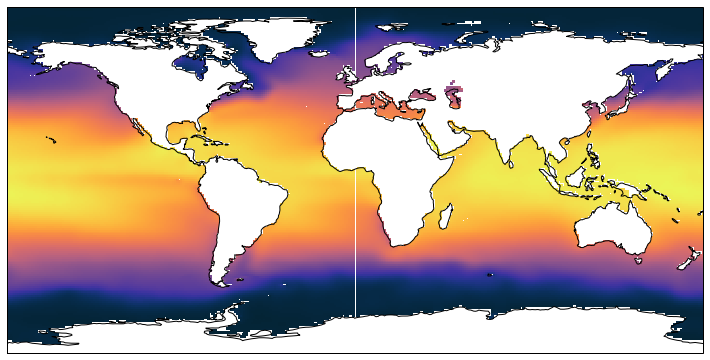

In [5]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.pcolormesh(lon,\
                   lat,\
                   temp,\
                   vmin=-2,\
                   vmax=30,\
                   transform=ccrs.PlateCarree(),cmap=cmo.thermal )
ax.coastlines();

Ok, there is an ugly white line along 0 longitude, there is a simple way to fix it:

In [6]:
temp_cyc, lon_cyc = add_cyclic_point(temp, coord=lon)

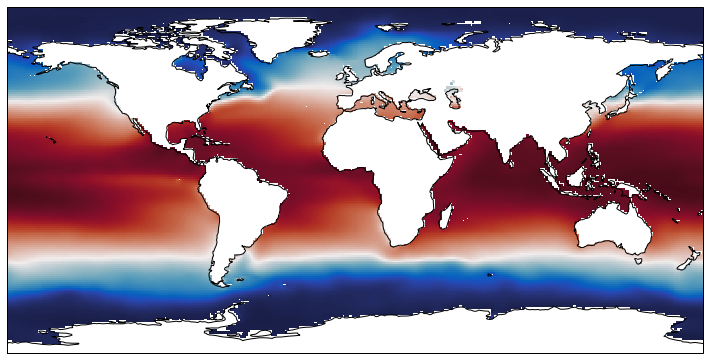

In [22]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.pcolormesh(lon_cyc,\
                   lat,\
                   temp_cyc,\
                   vmin=-2,\
                   vmax=30,\
                   transform=ccrs.PlateCarree(),\
                   cmap=cmo.balance )
ax.coastlines();

Looks fine. Now we will use default cartopy backgroung:

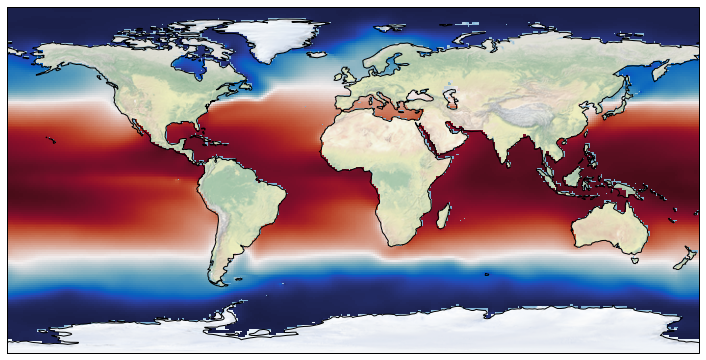

In [20]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.pcolormesh(lon_cyc,\
                   lat,\
                   temp_cyc,\
                   vmin=-2,\
                   vmax=30, \
                   transform=ccrs.PlateCarree(),\
                   cmap=cmo.balance )
ax.coastlines();
ax.stock_img();

Not that bad, but not exactly what I want.

Let's setup cartopy for use of the custom background. You have to have a folder that contain background images and a `json` file that describes images (see explination below). Then you have to create environment variable that contains the path to the folder: 

In [9]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/magik/PYTHON/cartopy/BG/"

Now you can specify name of the image in it's resolution in the `background_img()` method:

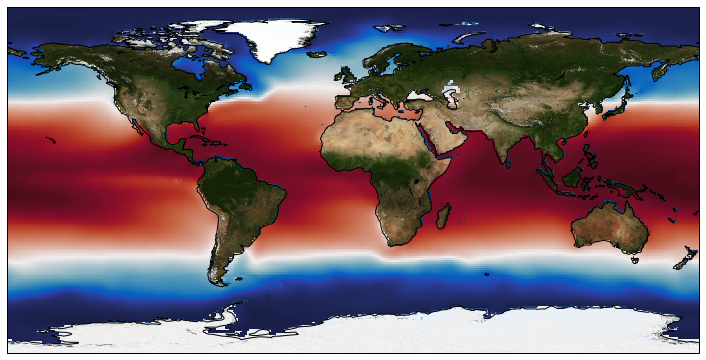

In [19]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.background_img(name='BM', resolution='low')
mm = ax.pcolormesh(lon_cyc,\
                   lat,\
                   temp_cyc,\
                   vmin=-2,\
                   vmax=30,\
                   transform=ccrs.PlateCarree(),\
                   cmap=cmo.balance )
ax.coastlines(resolution='110m');

And get a map with a nice background (Blue Marble in this case).

You can get a lot of nice map backgrounds from this NASA website https://neo.sci.gsfc.nasa.gov/. 

The json file that you have to put in to the background folder should be called `images.json` and look like this:

    {"__comment__": "JSON file specifying the image to use for a given type/name and
     resolution. Read in by cartopy.mpl.geoaxes.read_user_background_images.",
      "BM": {
        "__comment__": "Blue Marble Next Generation, July ",
        "__source__": "https://neo.sci.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG
    -TB",
        "__projection__": "PlateCarree",
        "low": "BM.jpeg",
        "high": "BMNG_hirez.png"},

        "pop": {
        "__comment__": "Population density from Nasa earth observations website",
        "__source__": "https://neo.sci.gsfc.nasa.gov/view.php?datasetId=SEDAC_POP",
        "__projection__": "PlateCarree",
        "high": "population.jpg"}
    }


As you can see one can specify different "resolutions" for the same image name which will just point to different files. 

That's it. Here is the [video of ocean circulation](https://www.youtube.com/watch?v=oTRH24oBmEE) that I have generated using this method. Below are just two more examples.

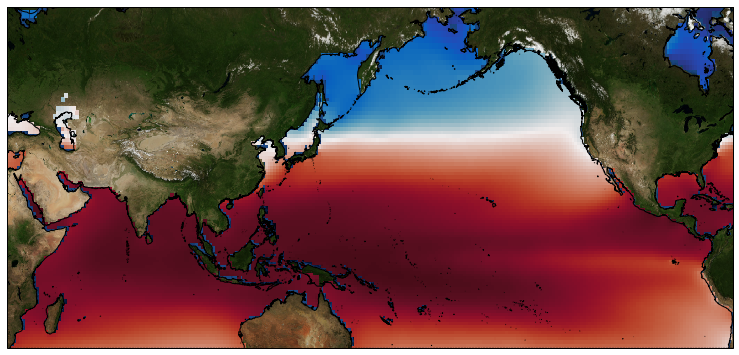

In [26]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=180, min_latitude=-30, max_latitude=67))
ax.background_img(name='BM', resolution='high')
ax.set_extent([30,-70,-30,70])
mm = ax.pcolormesh(lon,\
                   lat,\
                   temp,vmin=-2, vmax=30, transform=ccrs.PlateCarree(),cmap=cmo.balance )
ax.coastlines(resolution='10m');

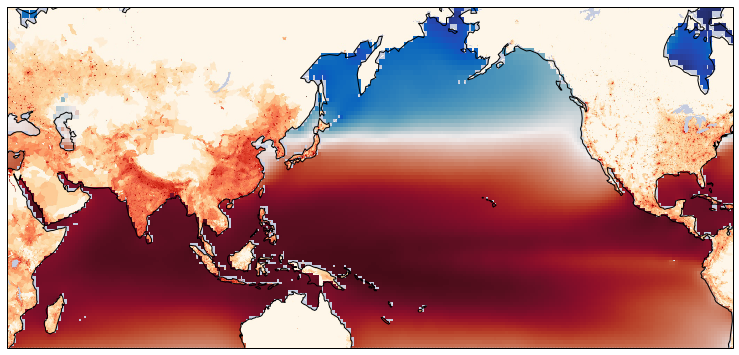

In [27]:
plt.figure(figsize=(13,6.2))
    
ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=180, min_latitude=-30, max_latitude=67))
ax.background_img(name='pop', resolution='high')
ax.set_extent([30,-70,-30,70])
mm = ax.pcolormesh(lon,\
                   lat,\
                   temp,vmin=-2, vmax=30, transform=ccrs.PlateCarree(),cmap=cmo.balance )
ax.coastlines();

